In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
 class BaseTransforms():
    def __init__(self,resize,mean,std):
      self.base_transform = transforms.Compose([
          transforms.Resize(resize),
          transforms.CenterCrop(resize),
          transforms.ToTensor(),
          transforms.Normalize(mean,std)
      ])
    def __call__(self,img):
      return self.base_transform(img)

In [ ]:
!ls

data  sample_data


In [ ]:
!mkdir dataa

In [ ]:
!mv dog1.jpg dataa

mv: cannot stat 'dog1.jpg': No such file or directory


In [ ]:
!ls

data  dataa  sample_data


In [ ]:
image_file_path ="./data/"

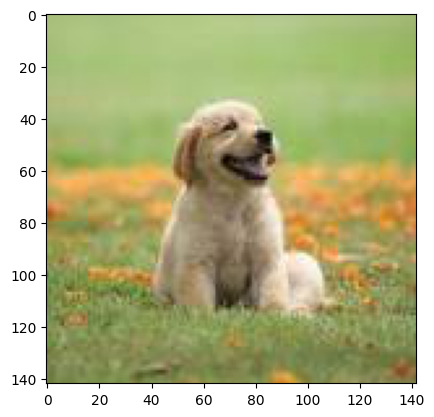

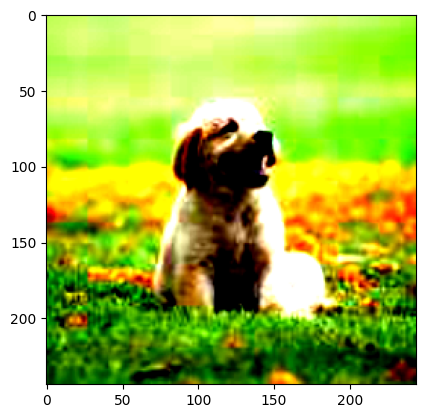

In [ ]:
image_file_path ="dog1.jpg"
img = Image.open(image_file_path)
plt.imshow(img)
plt.show()

resize =244
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransforms(resize,mean,std)
img_tran = transform(img)

img_tran =img_tran.numpy().transpose(1,2,0)
img_tran =np.clip(img_tran,0,1)
plt.imshow(img_tran)
plt.show()

In [ ]:
class Predictor:
  def __init__(self, class_index):
    self.class_index = class_index
  
  def predict_max(self, out):
    maxid = np.argmax(out.detach().numpy())
    predicted_label_name = self.class_index[str(maxid)]
    return predicted_label_name

In [ ]:
import json

In [ ]:
!ls

data  dataa  dog1.jpg  imagenet_class_index.json  sample_data


In [ ]:
class_index =json.load(open('./imagenet_class_index.json','r'))

In [ ]:
predictor =Predictor(class_index)

In [ ]:
img_path ='dog1.jpg'
img=Image.open(img_path)
resize =244
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransforms(resize,mean,std)
img_tran =transform(img)
img_tran = img_tran.unsqueeze_(0)
#img_tran.shape
out =net(img_tran)
result =predictor.predict_max(out)

In [ ]:
result

['n02113799', 'standard_poodle']